# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [182]:
#!pip install tensorflow

In [183]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.4.1


## Домашнее задание

  1. Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу.  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [184]:
from sklearn.datasets import load_boston

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [186]:
df = load_boston()

In [187]:
type(df)

sklearn.utils.Bunch

In [188]:
dataset = pd.DataFrame(df.data)

In [189]:
dataset.columns = df.feature_names

In [190]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [191]:
dataset.shape

(506, 13)

In [192]:
# X, y = load_boston(return_X_y=True)

In [193]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.python.client import device_lib
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [196]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(32, activation='linear'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='MSE',
              metrics=['MAE'])

model.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_235 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_236 (Dense)            (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [197]:
history = model.fit(X, y,
                    epochs=10,
                    batch_size=50,
                    verbose=2,
                    validation_split=0.05)

Epoch 1/10
10/10 - 1s - loss: 1625.7084 - MAE: 31.5947 - val_loss: 259.7770 - val_MAE: 14.1818
Epoch 2/10
10/10 - 0s - loss: 262.9669 - MAE: 12.8925 - val_loss: 75.7174 - val_MAE: 7.3594
Epoch 3/10
10/10 - 0s - loss: 208.9369 - MAE: 10.9380 - val_loss: 114.0884 - val_MAE: 9.2714
Epoch 4/10
10/10 - 0s - loss: 131.9339 - MAE: 9.1667 - val_loss: 62.7809 - val_MAE: 6.7653
Epoch 5/10
10/10 - 0s - loss: 95.2393 - MAE: 7.4957 - val_loss: 80.7666 - val_MAE: 6.9677
Epoch 6/10
10/10 - 0s - loss: 82.2141 - MAE: 6.7754 - val_loss: 51.3615 - val_MAE: 5.2231
Epoch 7/10
10/10 - 0s - loss: 71.3543 - MAE: 6.3816 - val_loss: 38.2805 - val_MAE: 5.0189
Epoch 8/10
10/10 - 0s - loss: 67.5126 - MAE: 6.0209 - val_loss: 43.5443 - val_MAE: 4.9306
Epoch 9/10
10/10 - 0s - loss: 62.5388 - MAE: 5.8071 - val_loss: 47.7952 - val_MAE: 5.2190
Epoch 10/10
10/10 - 0s - loss: 60.8921 - MAE: 5.7047 - val_loss: 45.1495 - val_MAE: 5.0744


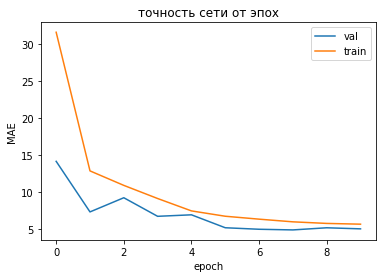

In [198]:
plt.plot(history.history['val_MAE'], label='val')
plt.plot(history.history['MAE'], label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('точность сети от эпох')
plt.show()

### Строим 10-15 вариантов и сводим их в одну таблицу

In [199]:
def color_map_color(value, cmap_name='Paired', vmin=0, vmax=1):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)
    rgb = cmap(norm(abs(value)))[:3]
    color = matplotlib.colors.rgb2hex(rgb)
    return color

Epoch 1/10
10/10 - 1s - loss: 360.9273 - MAE: 15.4103 - val_loss: 252.1750 - val_MAE: 14.3065
Epoch 2/10
10/10 - 0s - loss: 137.2319 - MAE: 9.3868 - val_loss: 45.2306 - val_MAE: 5.4612
Epoch 3/10
10/10 - 0s - loss: 89.0081 - MAE: 6.9339 - val_loss: 64.1605 - val_MAE: 6.3308
Epoch 4/10
10/10 - 0s - loss: 73.7212 - MAE: 6.0747 - val_loss: 46.7024 - val_MAE: 5.0665
Epoch 5/10
10/10 - 0s - loss: 67.5333 - MAE: 6.0548 - val_loss: 28.4420 - val_MAE: 4.4532
Epoch 6/10
10/10 - 0s - loss: 64.5301 - MAE: 5.6761 - val_loss: 30.3231 - val_MAE: 4.0560
Epoch 7/10
10/10 - 0s - loss: 59.8748 - MAE: 5.5216 - val_loss: 30.3963 - val_MAE: 4.1098
Epoch 8/10
10/10 - 0s - loss: 59.3506 - MAE: 5.4177 - val_loss: 30.9126 - val_MAE: 3.9079
Epoch 9/10
10/10 - 0s - loss: 56.8773 - MAE: 5.2551 - val_loss: 28.0945 - val_MAE: 4.0233
Epoch 10/10
10/10 - 0s - loss: 58.4328 - MAE: 5.7302 - val_loss: 40.3593 - val_MAE: 4.7006
Epoch 1/10
10/10 - 1s - loss: 563.5778 - MAE: 19.5539 - val_loss: 208.7460 - val_MAE: 12.7894


Epoch 1/10
10/10 - 1s - loss: 392.9016 - MAE: 12.9347 - val_loss: 34.8485 - val_MAE: 5.4129
Epoch 2/10
10/10 - 0s - loss: 93.0377 - MAE: 6.8314 - val_loss: 88.3681 - val_MAE: 8.3561
Epoch 3/10
10/10 - 0s - loss: 125.9736 - MAE: 8.9347 - val_loss: 37.1917 - val_MAE: 4.8605
Epoch 4/10
10/10 - 0s - loss: 141.9873 - MAE: 9.2706 - val_loss: 135.1626 - val_MAE: 10.3475
Epoch 5/10
10/10 - 0s - loss: 83.7016 - MAE: 6.5676 - val_loss: 24.4411 - val_MAE: 3.9109
Epoch 6/10
10/10 - 0s - loss: 120.9554 - MAE: 8.5196 - val_loss: 119.0319 - val_MAE: 10.0397
Epoch 7/10
10/10 - 0s - loss: 97.4784 - MAE: 7.7231 - val_loss: 67.5206 - val_MAE: 7.0584
Epoch 8/10
10/10 - 0s - loss: 105.8944 - MAE: 8.1230 - val_loss: 108.3763 - val_MAE: 9.4682
Epoch 9/10
10/10 - 0s - loss: 80.6626 - MAE: 6.8085 - val_loss: 51.1266 - val_MAE: 5.8329
Epoch 10/10
10/10 - 0s - loss: 98.6962 - MAE: 7.5591 - val_loss: 215.9917 - val_MAE: 13.7525
Epoch 1/10
10/10 - 1s - loss: 136.9705 - MAE: 8.7241 - val_loss: 35.8491 - val_MAE: 4.

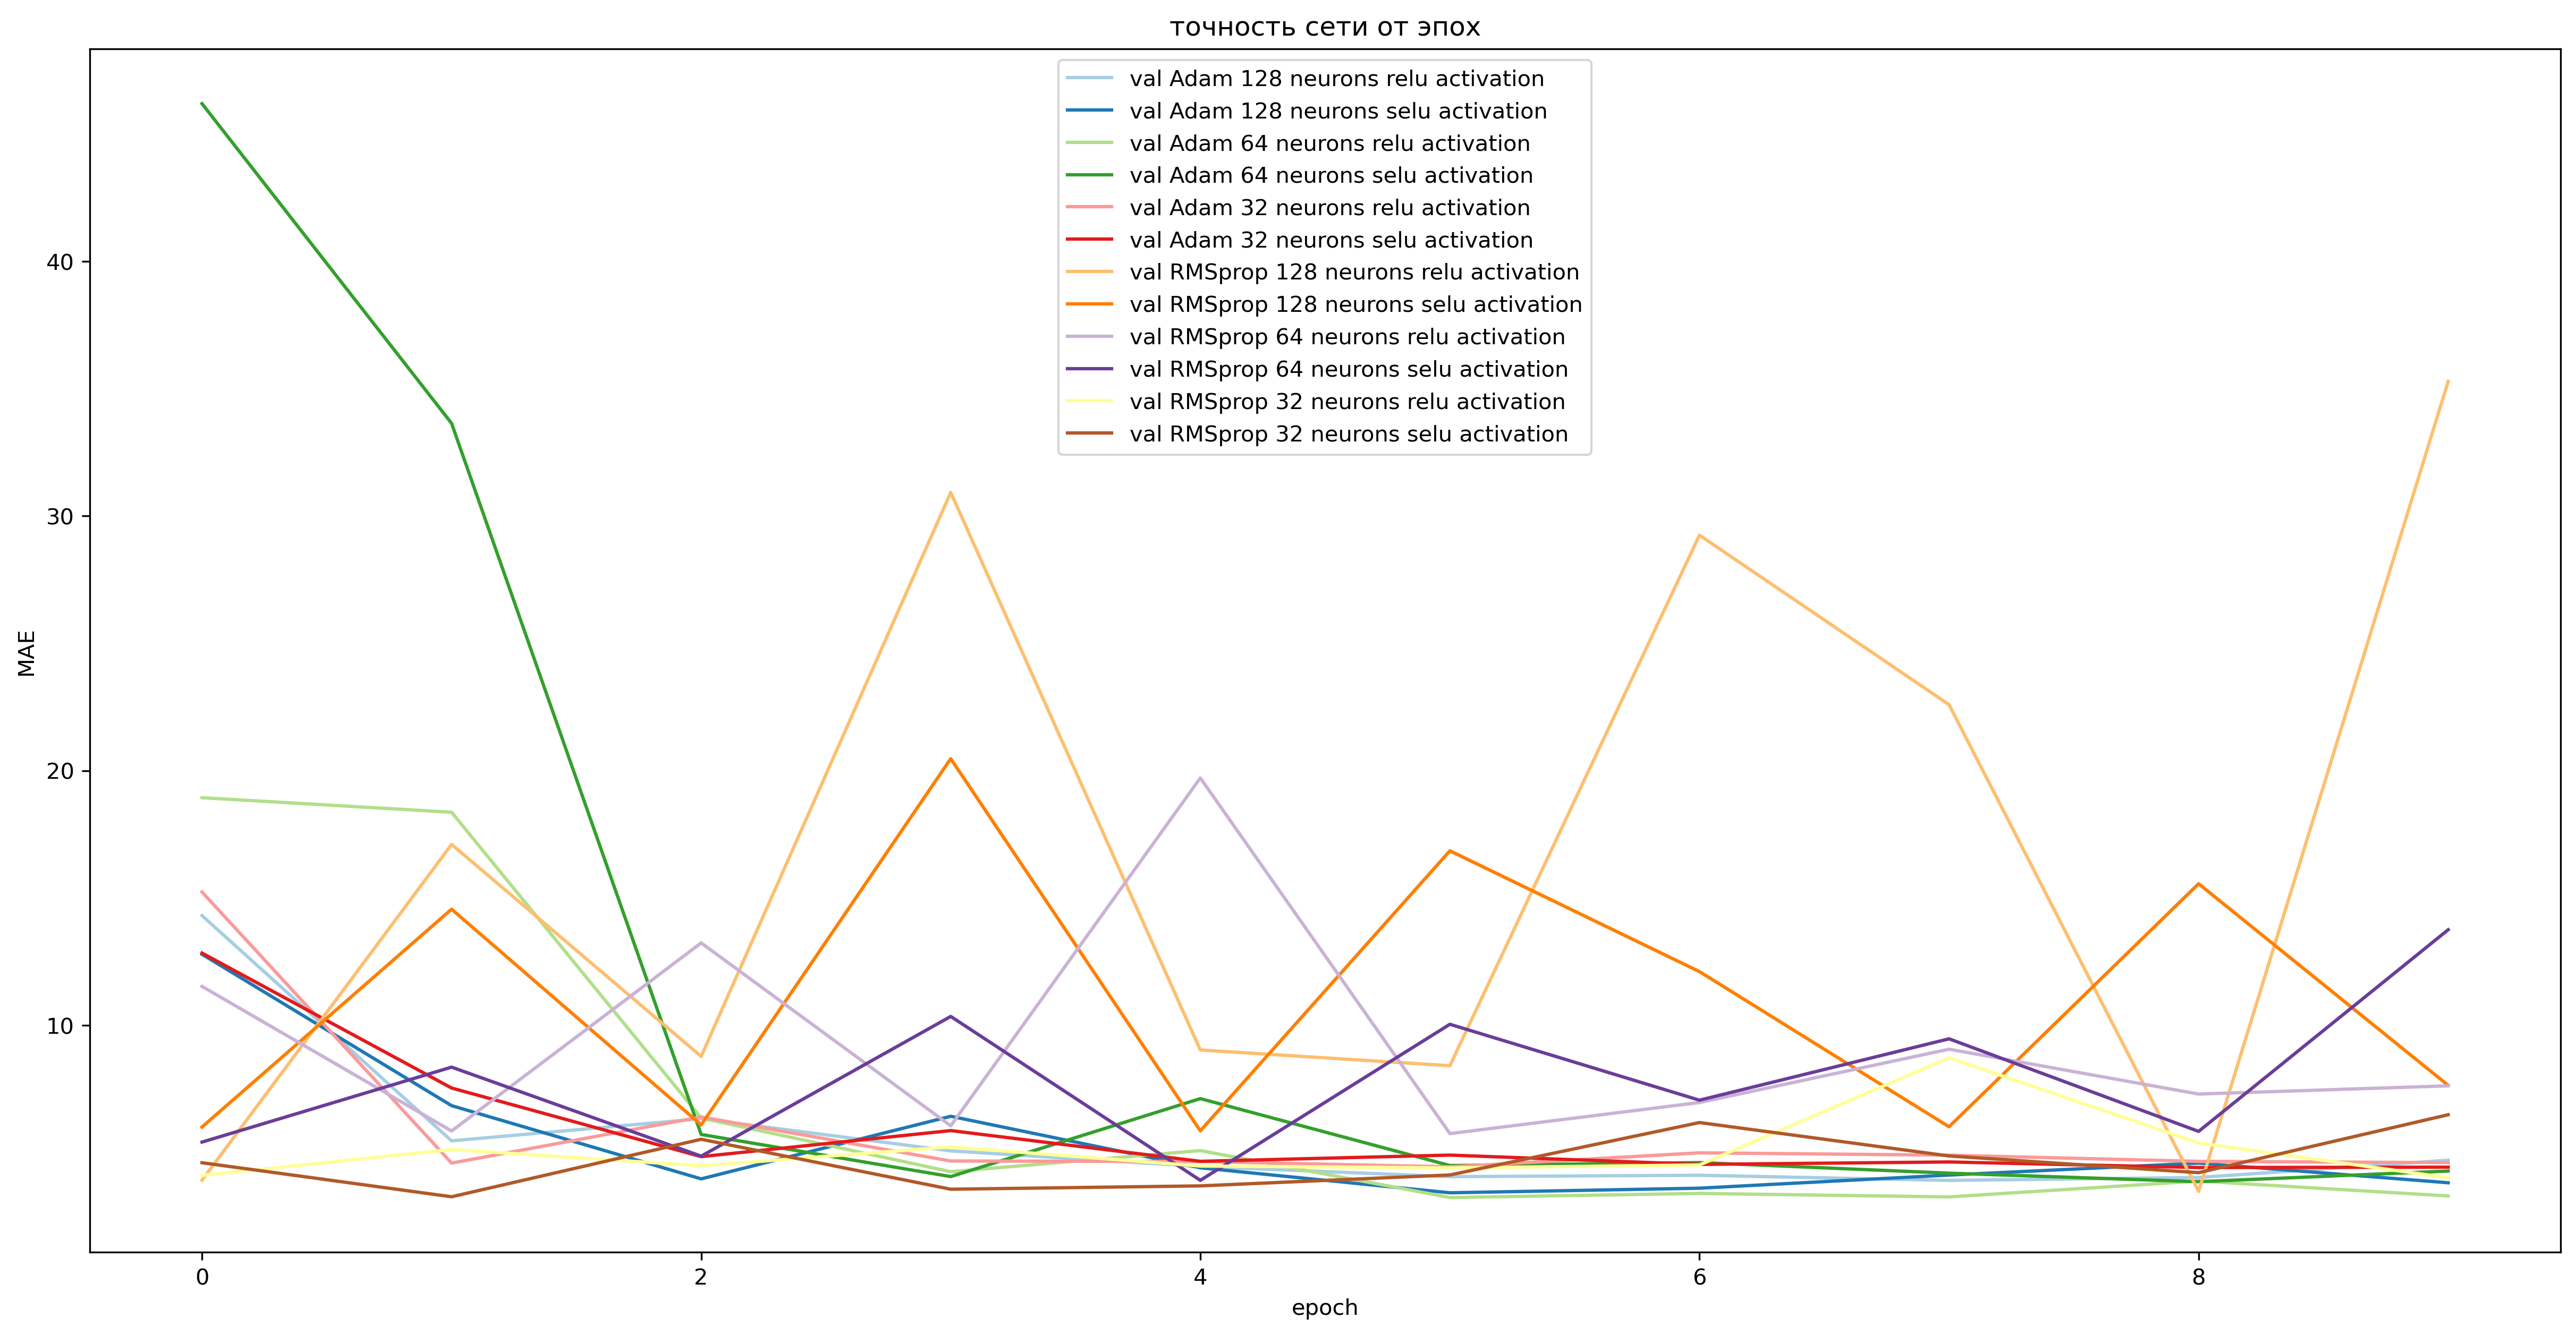

In [200]:
cmap = plt.cm.get_cmap('Spectral')
plt.figure(figsize=(20, 10), dpi=300)
i = 0.
metrics_dict = {}

for optimizer in [Adam(), RMSprop()]:
    for neuron in [128, 64, 32]:
        for activation in ['relu', 'selu']:
            model = Sequential([
                Dense(neuron, activation=activation, input_shape=(13,)),
                Dense(neuron / 2, activation=activation),
                Dense(1, activation='linear')
            ])
            
            model.compile(optimizer=optimizer,
                          loss='MSE',
                          metrics=['MAE'])
            
            history = model.fit(X, y,
                                epochs=10,
                                batch_size=50,
                                verbose=2,
                                validation_split=0.05)
            
            col = i / 12 + 1e-10
            plt.plot(history.history['val_MAE'],
                     color=color_map_color(col),
                     label=f'val {optimizer.get_config()["name"]} {neuron} neurons {activation} activation')
#             plt.plot(history.history['MAE'],\
#                      color=cmap(i),
#                      label=f'val {optimizer.get_config()["name"]} {neuron} neurons {activation} activation')
            
            metrics_dict[f'{optimizer.get_config()["name"]} {neuron} neurons {activation} activation'] =\
        (history.history['val_MAE'][-1:][0], history.history['MAE'][-1:][0])
                        
            i += 1

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.title('точность сети от эпох')
plt.show()

In [201]:
metrics_df = pd.DataFrame.from_dict(metrics_dict,
                                    orient='index',
                                    columns=['val_MAE', 'MAE'])
metrics_df.sort_values(by='val_MAE')

,val_MAE,MAE
Adam 64 neurons relu activation,3.298037,5.625201
Adam 128 neurons selu activation,3.815195,5.166213
RMSprop 32 neurons relu activation,4.012424,6.520110
Adam 64 neurons selu activation,4.275996,6.443886
Adam 32 neurons selu activation,4.427425,5.492248
Adam 32 neurons relu activation,4.605959,5.675465
Adam 128 neurons relu activation,4.700625,5.730173
RMSprop 32 neurons selu activation,6.487291,5.853999
RMSprop 64 neurons relu activation,7.621843,7.230549
RMSprop 128 neurons selu activation,7.641281,7.410087
